## Different Ways To Handle Imbalanced Dataset In Machine Learning
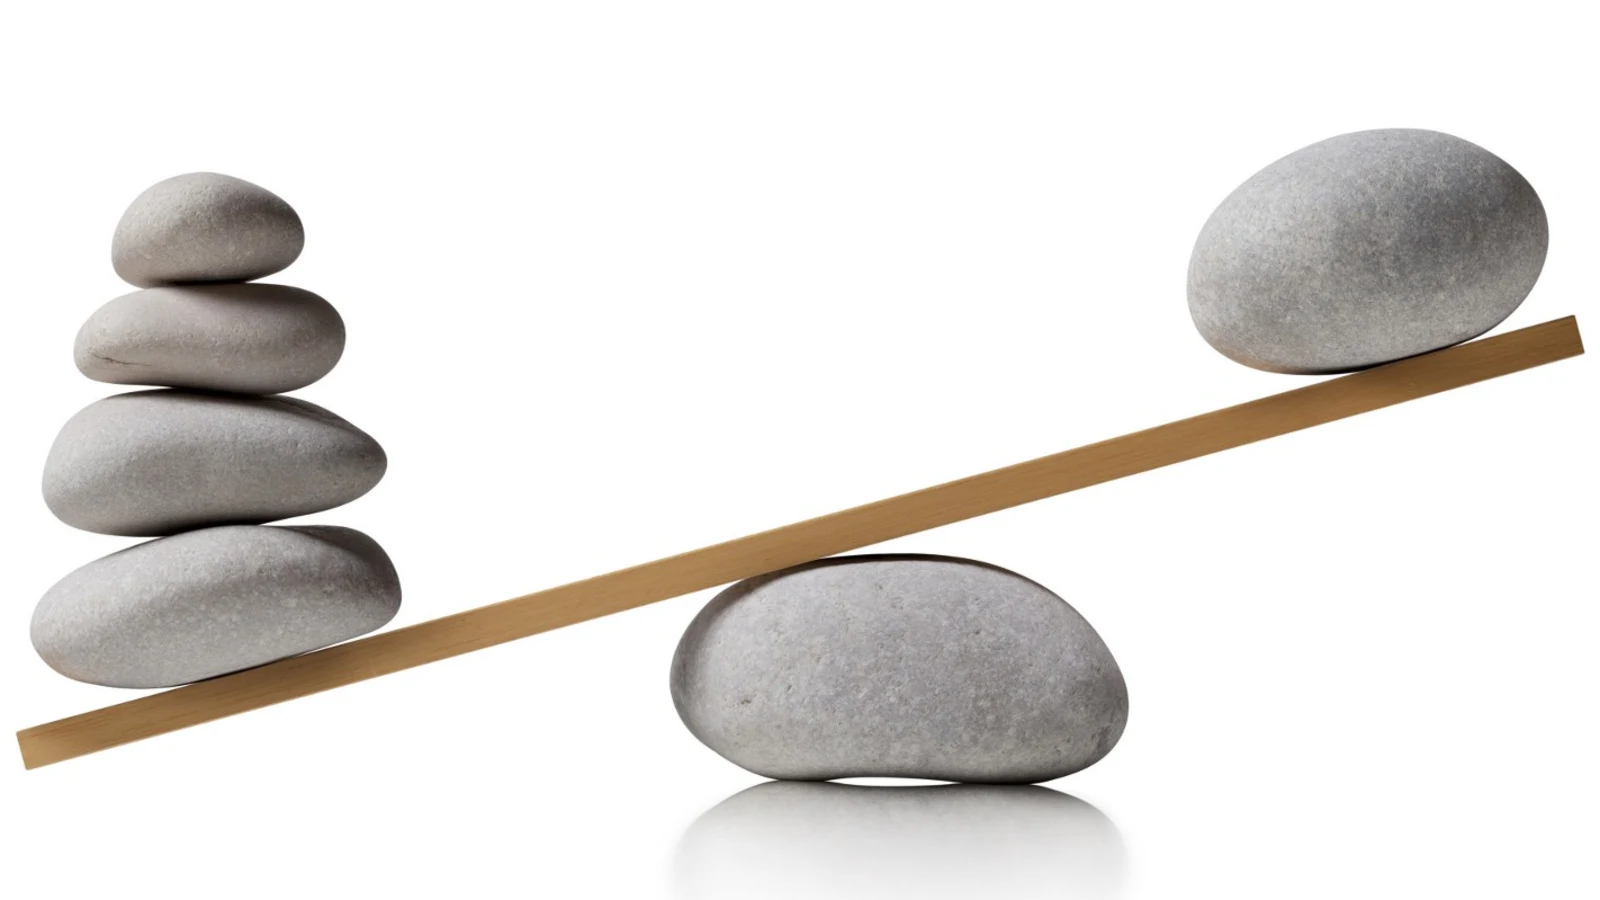

##### When we have an imbalanced dataset and if we build a machine learning model over imbalanced data, then there is a high chance of getting misclassification i.e incorrect classification. The machine learning model gets biased and gives inaccurate results.
##### Resampling is one of the most popular techniques to handle an imbalanced dataset. The main objective of resampling is to balance the dataset either by increasing the frequency of the minority class or by decreasing the frequency of the majority class.

##### 1.Under Sampling
Under Sampling is used to decrease the majority class by randomly eliminating the majority class. This is done until majority and minority class instances are balanced out.
##### 2.Over Sampling
Over Sampling is used to increase the minority class by randomly duplicating them.
##### 3.SMOTE 
SMOTE is an oversampling technique where the samples are generated for the minority class. These are not duplicate or replicate of existing minority class data. It creates new points for the minority class.
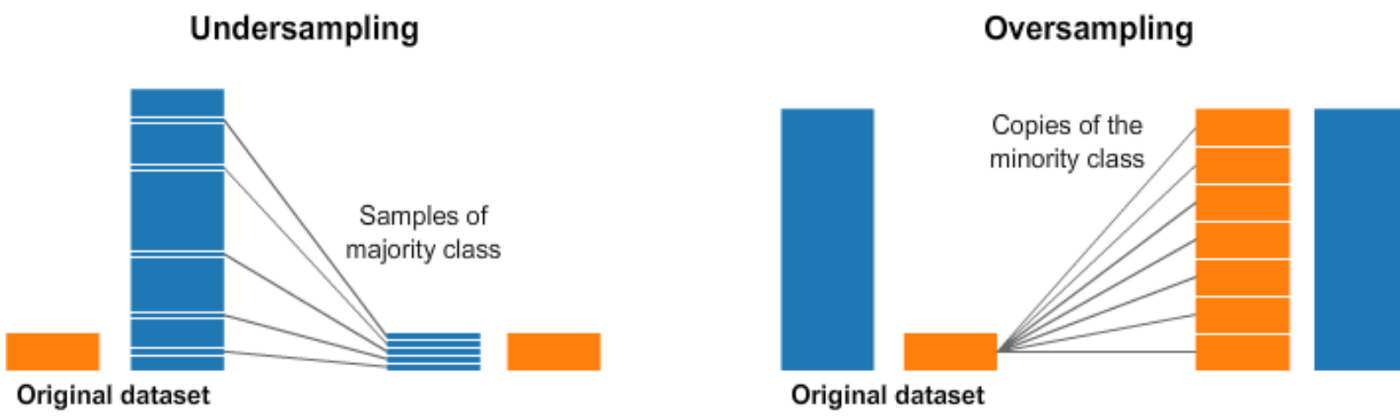

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [4]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

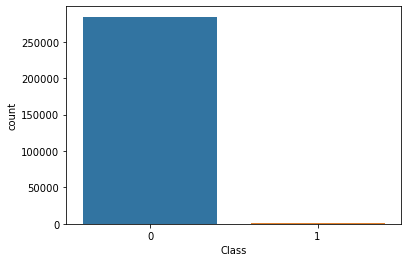

In [8]:
sns.countplot(x=data['Class'])

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

##### Based on the above data it is clear that this is imbalanced dataset

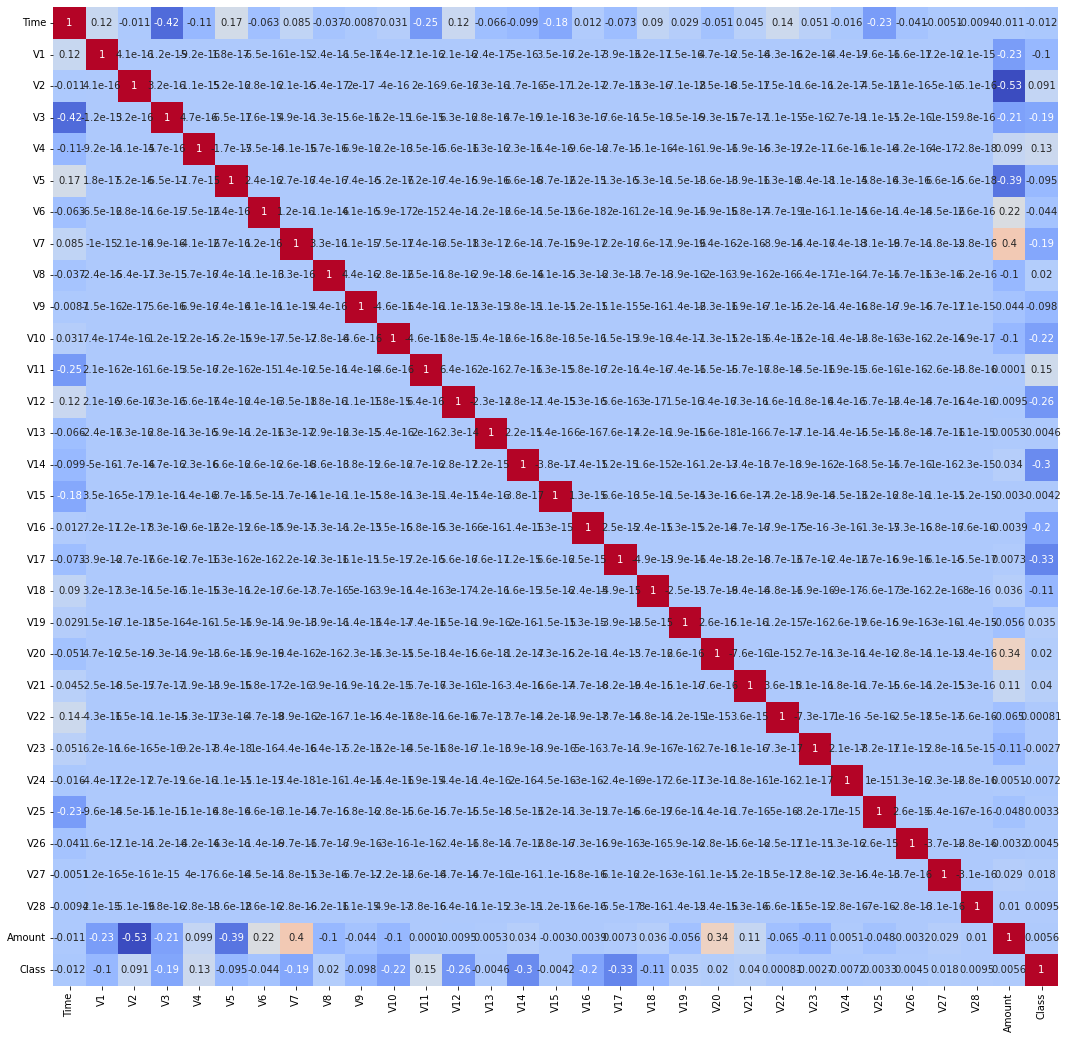

In [11]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',cbar=False)
plt.show()

In [12]:
ss=StandardScaler()
data['normAmount'] = ss.fit_transform(np.array(data['Amount']).reshape(-1, 1))

In [13]:
data = data.drop(['Time', 'Amount'], axis = 1)

##### Splitting the data 

In [15]:
X=data.drop('Class',axis=1)
y=data['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

#### Train the model without handling the imbalanced class distribution

In [17]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,lr_pred)))

[[85274    27]
 [   50    92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.77      0.65      0.70       142

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score 0.9990988144142879


#### The accuracy comes out to be 100% but, the recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.

#### Now, let me apply different imbalanced data handling techniques and look at their accuracy and recall results.

### Applying NearMiss Algorithm

In [19]:
from imblearn.under_sampling import NearMiss
nr=NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [21]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 350
Before Undersampling, counts of label '0': 199014 

After Undersampling, the shape of train_X: (700, 29)
After Undersampling, the shape of train_y: (700,) 

After Undersampling, counts of label '1': 350
After Undersampling, counts of label '0': 350


In [22]:
lr1=LogisticRegression()
lr1.fit(X_train_miss,y_train_miss)
lr1_pred=lr1.predict(X_test)

print(confusion_matrix(y_test,lr1_pred))
print(classification_report(y_test,lr1_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,lr1_pred)))

[[34908 50393]
 [    5   137]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58     85301
           1       0.00      0.96      0.01       142

    accuracy                           0.41     85443
   macro avg       0.50      0.69      0.29     85443
weighted avg       1.00      0.41      0.58     85443

Accuracy Score 0.41015647858806453


#### Due to undersampling of majority class, its recall has decreased to 56 %.

### Applying SMOTE

In [23]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 350
Before OverSampling, counts of label '0': 199014 

After OverSampling, the shape of train_X: (398028, 29)
After OverSampling, the shape of train_y: (398028,) 

After OverSampling, counts of label '1': 199014
After OverSampling, counts of label '0': 199014


#### LogisticRegression

In [24]:
lr2=LogisticRegression()
lr2.fit(X_train_res,y_train_res)
lr2_pred=lr2.predict(X_test)

print(confusion_matrix(y_test,lr2_pred))
print(classification_report(y_test,lr2_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,lr2_pred)))

[[83353  1948]
 [   16   126]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.89      0.11       142

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy Score 0.9770139157098885


### RandomForest

In [25]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)
rf_pred=rf.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_pred)))

[[85275    26]
 [   28   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.81      0.80      0.81       142

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score 0.9993679997191109


#### SMOTE is giving great accuracy and recall with RandomForest Regressior. So, this model can be used